In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fraud_detection.csv')

In [3]:
data.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,1/1/2023 0:00,596,3156,533.07,31,0,0,0
1,1,1,1/1/2023 0:02,4961,3412,808.56,130,0,0,0
2,2,2,1/1/2023 0:07,2,1365,1442.94,476,0,1,1
3,3,3,1/1/2023 0:09,4128,8737,620.65,569,0,0,0
4,4,4,1/1/2023 0:10,927,9906,490.66,634,0,0,0


In [4]:
data.rename(columns={'TRANSACTION_ID': 'ID', 'TX_DATETIME': 'DateTime', 'TX_AMOUNT': 'Transaction_amount', 
                    'TX_TIME_SECONDS': 'Transaction_time_seconds', 'TX_FRAUD': 'Fraudulent'}, inplace = True)

In [5]:
data.drop(columns=['Unnamed: 0', 'TX_TIME_DAYS', 'TX_FRAUD_SCENARIO'], axis = 1, inplace = True)

In [6]:
data.head()

,ID,DateTime,CUSTOMER_ID,TERMINAL_ID,Transaction_amount,Transaction_time_seconds,Fraudulent
0,0,1/1/2023 0:00,596,3156,533.07,31,0
1,1,1/1/2023 0:02,4961,3412,808.56,130,0
2,2,1/1/2023 0:07,2,1365,1442.94,476,1
3,3,1/1/2023 0:09,4128,8737,620.65,569,0
4,4,1/1/2023 0:10,927,9906,490.66,634,0


Text(0, 0.5, 'Count')

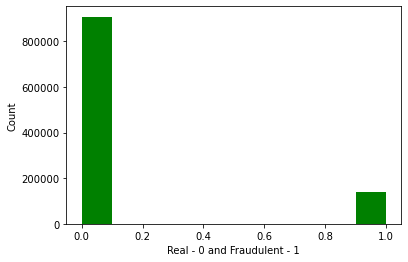

In [7]:
plt.hist(data['Fraudulent'], bins = 10, color = 'green')
plt.xlabel('Real - 0 and Fraudulent - 1')
plt.ylabel('Count')

In [8]:
data = data.dropna(how='any',axis=0) 

In [9]:
data.shape

(1048575, 7)

In [10]:
real_data = data[data['Fraudulent']== 0]
fake_data = data[data['Fraudulent']==1]

In [11]:
fake_samples = len(fake_data)
fake_samples

140473

In [12]:
real_samples = real_data.sample(n = fake_samples, random_state= 42)

In [13]:
data = pd.concat([fake_data, real_samples])

In [14]:
data.shape

(280946, 7)

In [15]:
X = data.drop(columns = ['Fraudulent', 'DateTime'] , axis= 1)
y = data['Fraudulent']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(n_estimators=100)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
report = classification_report(y_test, y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     28307
           1       1.00      0.97      0.98     27883

    accuracy                           0.98     56190
   macro avg       0.98      0.98      0.98     56190
weighted avg       0.98      0.98      0.98     56190

